In [1]:
from pathlib import Path

from rljax.algorithm import SAC_Discrete
from rljax.trainer import Trainer
import numpy as np
import pandas as pd

from classes import Env, Preprocess

PATH = Path().cwd()

In [2]:
raw = Preprocess(PATH.joinpath('asset_data', 'SH_SDS_data.csv'))
data = raw.process()

In [3]:
def sniper(state_1, state_2, env, start_state):
    state = start_state
    done = False
    all_rewards = list()
    while not done:
        if state[0] == state_1:
            state, reward, done, _ = env.step(0)
        elif state[0] == state_2:
            state, reward, done, _ = env.step(1)
        else:
            state, reward, done, _ = env.step(2)
        all_rewards.append(reward)
    return all_rewards

In [4]:
env = Env(data, no_trade_period=10, steps=2000)
mappings = env.mapping
sniper(mappings['220'], mappings['302'], env, env.reset())
sniper(mappings['220'], mappings['302'], env, env.reset())
env.summarize_state_decisions('302')

KeyError: '302'

In [ ]:
env.summarize_state_decisions('220')

In [ ]:
env.plot_state_frequency()

In [ ]:
env.summarize_decisions()

In [5]:
def return_rewards(current, last, action, p, c):
    return sum(current) - sum(last)

In [6]:
# 23,400 seconds between 9:30am and 4pm broken in 10 second increments

NUM_AGENT_STEPS = 10000
SEED = 0
DAYS = 1
DAY = 2340

env = Env(data, no_trade_period=5, fixed_buy_cost=0.0015, fixed_sell_cost=0.0015, steps=DAY*DAYS, reward_func=return_rewards)
env_test = env.copy_env()

algo = SAC_Discrete(
    num_agent_steps=NUM_AGENT_STEPS,
    state_space=env.observation_space,
    action_space=env.action_space,
    seed=SEED,
    batch_size=256,
    start_steps=1000,
    update_interval=1,
    update_interval_target=400
)

trainer = Trainer(
    env=env,
    env_test=env_test,
    algo=algo,
    log_dir="",
    num_agent_steps=NUM_AGENT_STEPS,
    eval_interval=2500,
    seed=SEED,
)
trainer.train()

Num steps: 2500     Return: 0.3     Time: 0:01:24
Num steps: 5000     Return: 8.6     Time: 0:02:46
Num steps: 7500     Return: 27.7    Time: 0:04:06
Num steps: 10000    Return: 29.8    Time: 0:05:17


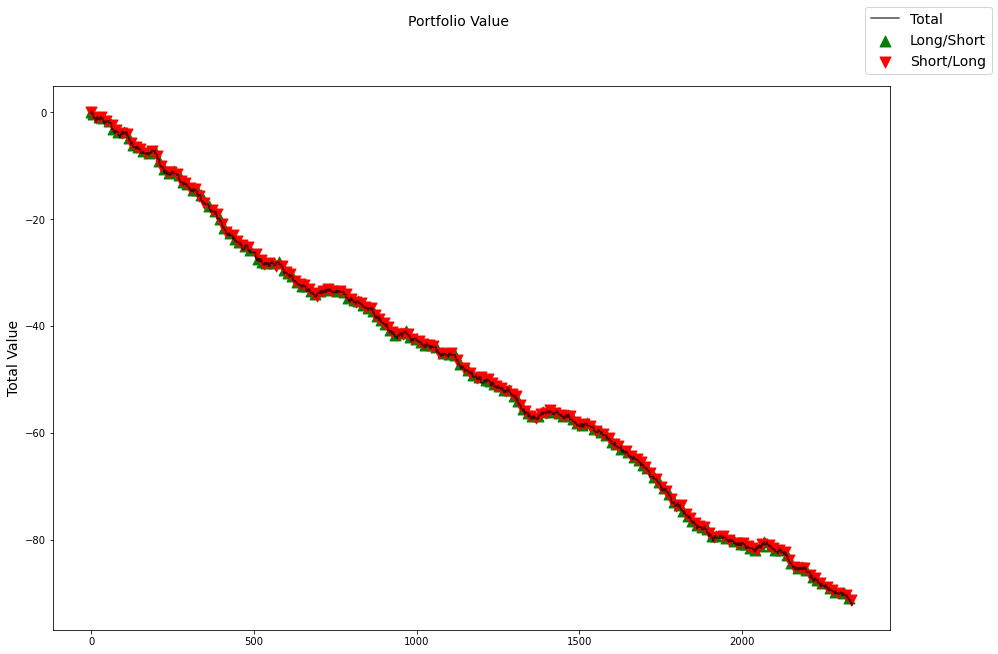

In [7]:
env.plot()

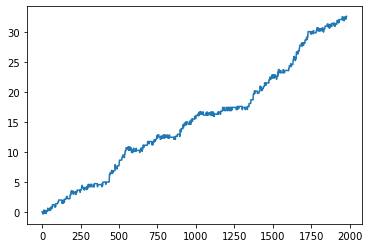

In [8]:
import matplotlib.pyplot as plt
plt.plot(np.sum(env_test.portfolio_history, axis = 1))

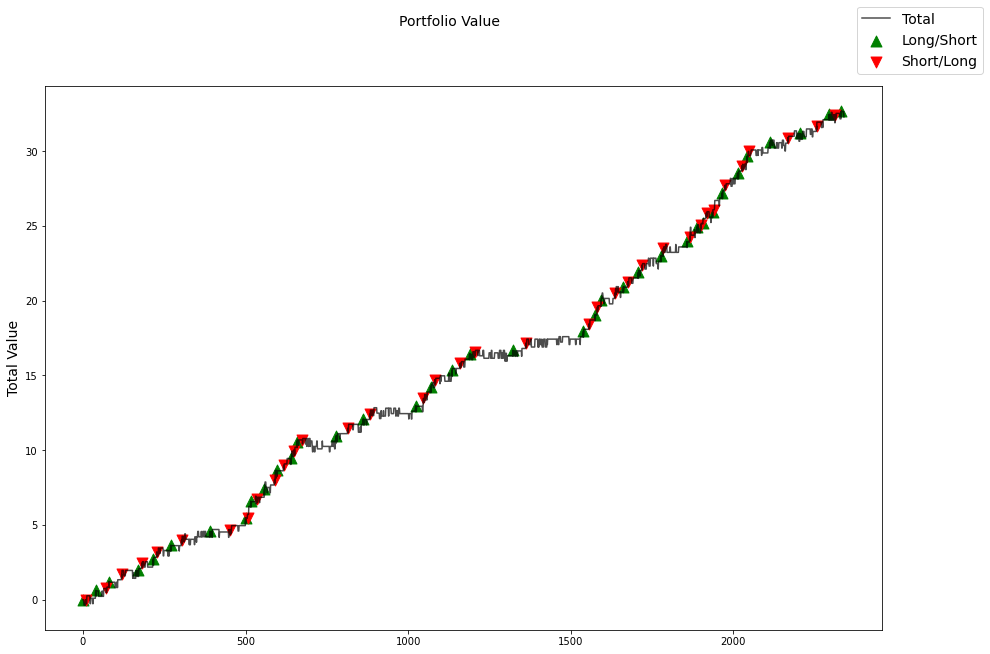

In [9]:
env_test.plot()

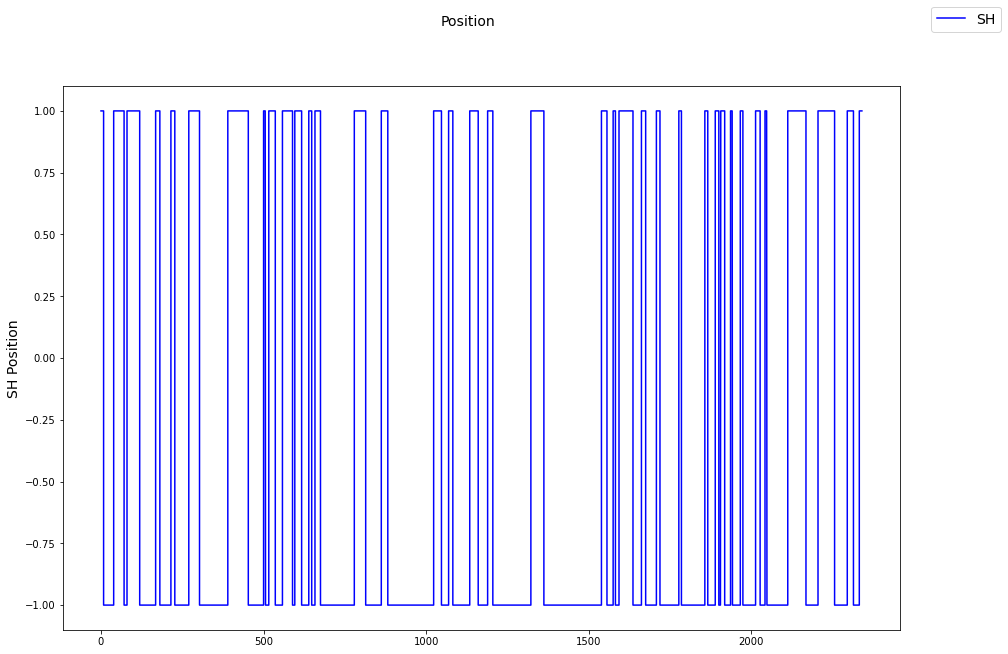

In [10]:
env_test.plot('position_history')

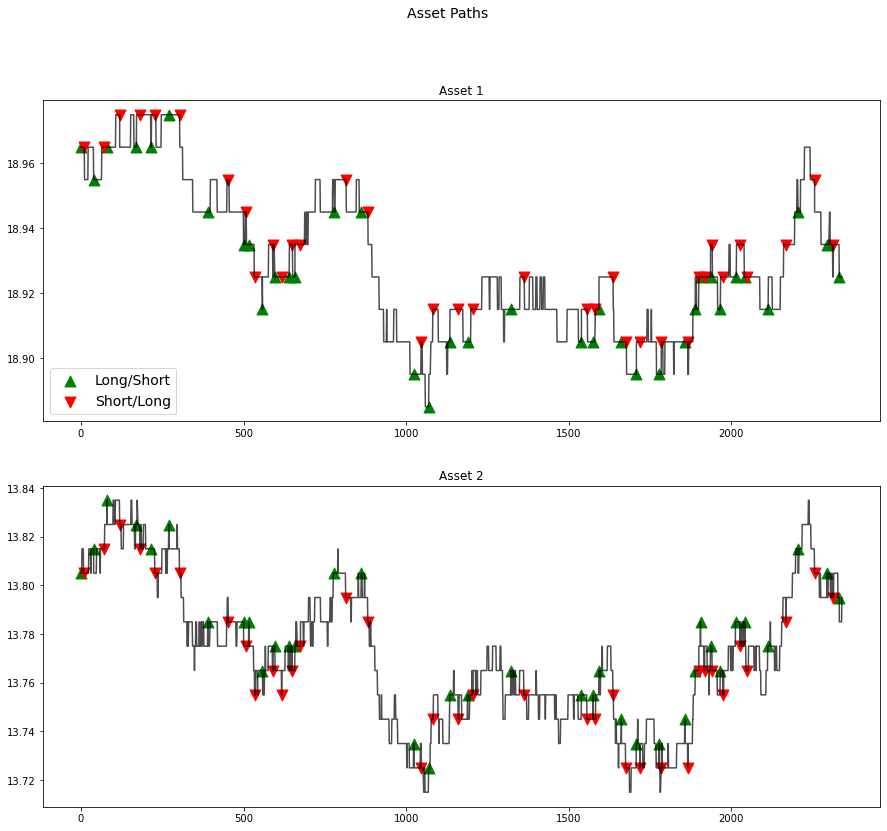

In [11]:
env_test.plot('asset_paths')

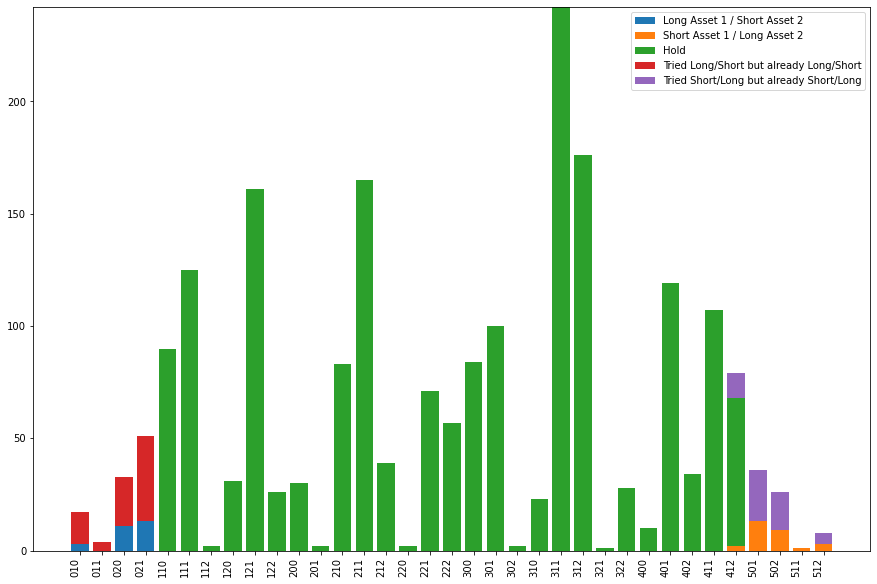

In [12]:
env_test.summarize_decisions()